In [ ]:
import pandas as pd
from fastai.vision.all import *
from sklearn.model_selection import train_test_split
import os
from glob import glob
from sklearn import metrics
import json
import pathlib

# CheXpert v2 Race Validation on Shenzhen Dataset

<BarContainer object of 4 artists>

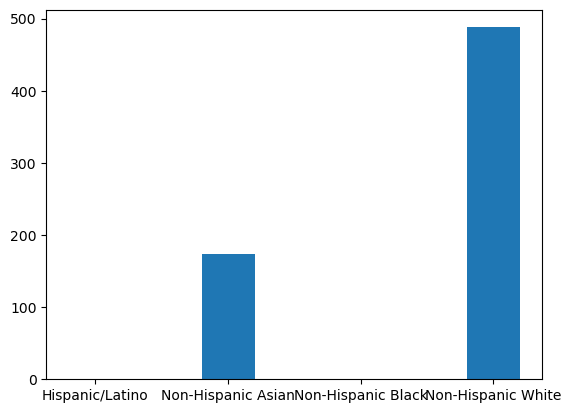

In [ ]:
base_jpg_path = r"D:\Shenzhen_CXR"
test_df = pd.read_csv(os.path.join(base_jpg_path, "shenzhen_metadata.csv"))
pathlib.PosixPath = pathlib.WindowsPath
test_df['path']= r'images\images/' + test_df['study_id']
race_model = load_learner(r"C:\Users\pree1\Downloads\chexpert_race2.pkl") # replace
test_df['race'] = 'Asian'
test_path = r'D:\Shenzhen_CXR'# Replace this with the root path of your test images


# Create a DataLoader for the test set
dls_test = ImageDataLoaders.from_df(
    test_df,
    test_path,
    fn_col='path',
    label_col='race',  # or any other label column if available, otherwise you can use 'is_valid=False' to indicate no labels
    valid_pct=0.0,       # No validation split as this is the test set
    num_workers=4,
    device=torch.device('cuda'),
    item_tfms=Resize(224),
    bs=32
)
test_dl = dls_test.test_dl(test_df, with_labels=True)
race_model.dls = dls_test

race_model.dls = dls_test
race_model.dls.to(device='cuda')
race_model.model.to(device='cuda')
race_test_dl = race_model.dls.test_dl(test_df)
race_preds = race_model.get_preds(dl=race_test_dl, with_decoded=True)

predict_df = test_df
predict_df['Race/Ethnicity_Tensor_Id'] =race_preds[2].numpy()
predict_df['Race/Ethnicity_Probability'] =race_preds[0].numpy().tolist()
predict_df.to_csv('chexpert_race2_shenzhen_test.csv', index=False)

race_model = load_learner(r"C:\Users\pree1\Downloads\chexpert_race2.pkl") # replace
race_labels = race_model.dls.vocab.o2i.keys()
prediction_counts = [race_preds[2].tolist().count(0), race_preds[2].tolist().count(1), race_preds[2].tolist().count(2), race_preds[2].tolist().count(3)]
plt.bar(race_labels, prediction_counts, width = 0.4)

# MIMIC Race Validation on Shenzhen Dataset

<BarContainer object of 5 artists>

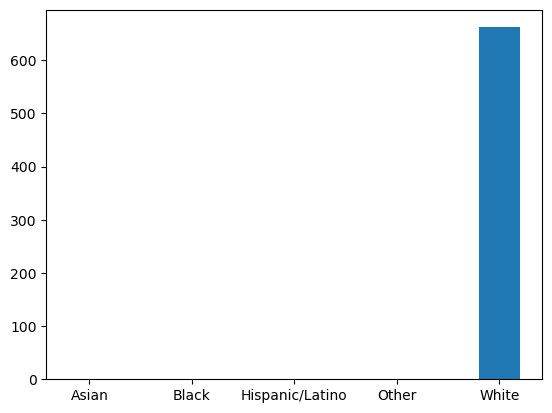

In [ ]:
base_jpg_path = r"D:\Shenzhen_CXR"
test_df = pd.read_csv(os.path.join(base_jpg_path, "shenzhen_metadata.csv"))
pathlib.PosixPath = pathlib.WindowsPath
test_df['path']= r'images\images/' + test_df['study_id']
race_model = load_learner(r"C:\Users\pree1\Downloads\mimic_race.pkl") # replace
test_df['race'] = 'Asian'
test_path = r'D:\Shenzhen_CXR'# Replace this with the root path of your test images


# Create a DataLoader for the test set
dls_test = ImageDataLoaders.from_df(
    test_df,
    test_path,
    fn_col='path',
    label_col='race',  # or any other label column if available, otherwise you can use 'is_valid=False' to indicate no labels
    valid_pct=0.0,       # No validation split as this is the test set
    num_workers=4,
    device=torch.device('cuda'),
    item_tfms=Resize(224),
    bs=32
)
test_dl = dls_test.test_dl(test_df, with_labels=True)
race_model.dls = dls_test

race_model.dls = dls_test
race_model.dls.to(device='cuda')
race_model.model.to(device='cuda')
race_test_dl = race_model.dls.test_dl(test_df)
race_preds = race_model.get_preds(dl=race_test_dl, with_decoded=True)

predict_df = test_df
predict_df['Race/Ethnicity_Tensor_Id'] =race_preds[2].numpy()
predict_df['Race/Ethnicity_Probability'] =race_preds[0].numpy().tolist()
predict_df.to_csv('mimic_race_shenzhen_test.csv', index=False)

race_model = load_learner(r"C:\Users\pree1\Downloads\mimic_race.pkl") # replace
race_labels = race_model.dls.vocab.o2i.keys()
prediction_counts = [race_preds[2].tolist().count(0), race_preds[2].tolist().count(1), race_preds[2].tolist().count(2), race_preds[2].tolist().count(3), race_preds[2].tolist().count(4)]
plt.bar(race_labels, prediction_counts, width = 0.4)